In [1]:
# project: p1
# submitter: ratushko
# partner: none
# hours: 26

In [2]:
# import statements
import copy
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from subprocess import check_output
import time

In [3]:
#Q1
type(7/2)

float

In [4]:
#Q2
x = 4
maximum = 10
minimum = 5
error = (x > 10) or (x < 5) # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3
word = "KAFKAESQUE"
suffix_match = word.upper()[5:] == "ESQUE" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
def add(x, y = 1):
    sum = x + y
    return sum

In [7]:
#Q4 
add(3, 4)

7

In [8]:
#Q5
add(9)

10

In [9]:
#Q6
x = 4
if x < 0:
    status = "negative"
elif x > 0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def smart_count(some_list):
    total = 0
    for x in some_list:
        if x > 10:
            continue
        elif x < 0:
            break
        else:
            total += x
    return total

In [12]:
#Q7
smart_count(nums)

14

In [13]:
#Q8
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1, "z": 3.14}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [15]:
#Q9
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [16]:
#Q10
rows[0][-1]["x"]

8

In [17]:
#Q11
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [18]:
#Q12
total_B = 0
for row in rows:
    num = row[header.index("B")]
    total_B += num

total_B

10007

In [19]:
#Q13
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [20]:
f = open("usd.json")
data = f.read()
f.close()

In [21]:
print(type(data))
print(data[:300] + "...")

<class 'str'>
{"eur":{"code":"EUR","alphaCode":"EUR","numericCode":"978","name":"Euro","rate":0.93122514336128,"date":"Tue, 14 Feb 2023 23:55:01 GMT","inverseRate":1.073854166341},"gbp":{"code":"GBP","alphaCode":"GBP","numericCode":"826","name":"U.K. Pound Sterling","rate":0.82145600809467,"date":"Tue, 14 Feb 202...


In [22]:
#Q14
f = open("usd.json")
data_1 = json.load(f)
f.close()
400 * data_1["eur"]["rate"]

372.490057344512

In [23]:
def divide(num1, num2):
    try:
        return num1 / num2
    except ZeroDivisionError:
        return float("nan")
        # print("float("nan")")

In [24]:
#Q15
divide(3, 2)

1.5

In [25]:
#Q16
divide(-3, 0)

nan

In [26]:
years = {}
year_list = os.listdir("home-computers")

for path in year_list:
    if path.endswith(".csv"):
        continue
    else:
        year_list.remove(path)
        
for filename in year_list:
    df = pd.read_csv("home-computers/" + filename, skiprows = [0])
    df.set_index("Geographic Area Name", inplace=True, drop=True)
    split_path = filename.split(".")
    year = int(split_path[0][-4:])
    years[year] = df
    
year_keys = list(years.keys())
year_keys.sort()
sorted_years = {i: years[i] for i in year_keys}

In [27]:
#Q17
years_list = list(sorted_years.keys())
years_list

[2013, 2014, 2015, 2016, 2017, 2018]

In [28]:
#Q18
df_2018 = sorted_years[2018]
df_2018.loc["Wisconsin"]["Estimate!!Total"]

2371960

In [29]:
#Q19
total_no_comp_est = sum(df_2018["Estimate!!Total!!No Computer"])
total_no_comp_est

10285814

In [30]:
#Q20
margin_error_per_state = df_2018["Margin of Error!!Total!!No Computer"] / df_2018["Estimate!!Total!!No Computer"]
margin_error_per_state.max()

0.12375641594322287

In [31]:
#Q21
per_state_no_comp = {}
adjacent_states_list = ["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]

for state in adjacent_states_list:
    percent_no_comp = (df_2018.loc[state]["Estimate!!Total!!No Computer"]/df_2018.loc[state]["Estimate!!Total"])*100
    per_state_no_comp[state] = percent_no_comp
    
per_state_no_comp

{'Illinois': 8.524143737625552,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

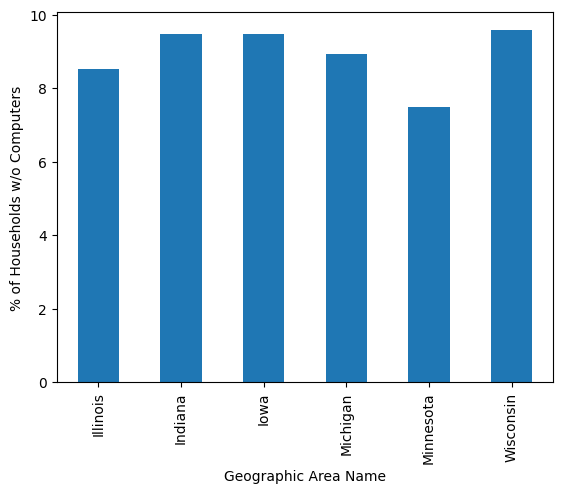

In [32]:
#Q22
per_state_series = pd.Series(per_state_no_comp)
plot = per_state_series.plot.bar()
plot.set_xlabel('Geographic Area Name')
plot.set_ylabel('% of Households w/o Computers')
None

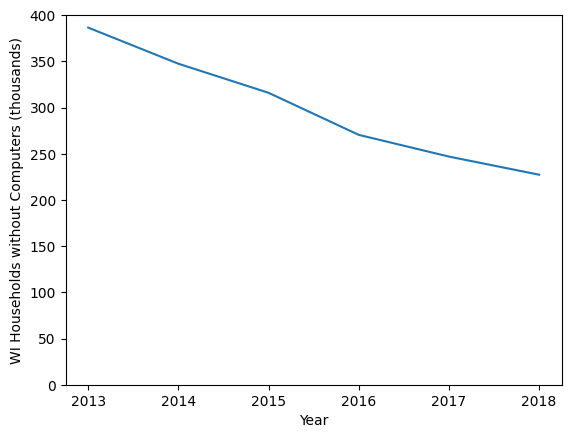

In [33]:
#Q23
wisco_no_comp = []
for year in sorted_years:
    value = sorted_years[year].loc["Wisconsin"]["Estimate!!Total!!No Computer"]/1000
    wisco_no_comp.append(value)

wisco_no_comp_series = pd.Series(wisco_no_comp)
wisco_no_comp_series.index = years_list

plot = wisco_no_comp_series.plot.line()
plot.set_xlabel('Year')
plot.set_ylabel('WI Households without Computers (thousands)')
plot.set_ylim([0, 400])
None

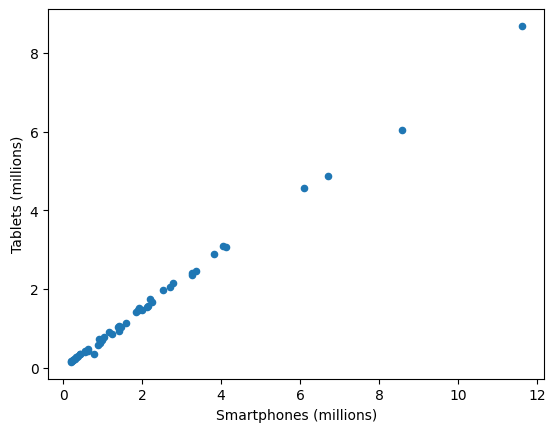

In [34]:
#Q24
df_2018_scatter = df_2018[["Estimate!!Total!!Has one or more types of computing devices!!Smartphone", "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]]
scatter_plot = (df_2018_scatter/1e6).plot.scatter(x = ("Estimate!!Total!!Has one or more types of computing devices!!Smartphone"), y = ("Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"))
scatter_plot.set_xlabel('Smartphones (millions)')
scatter_plot.set_ylabel('Tablets (millions)')
None

In [35]:
#Q25
check_output(["git", "checkout", "main"], cwd="flask")
flask_output = check_output(["git", "log"], cwd="flask")
flask_str = str(flask_output, "utf-8")
flask_list = flask_str.strip().split("\n")
flask_first_line = flask_list[0]
flask_first_line

Previous HEAD position was b15ad394 Added setup.py and README
Switched to branch 'main'


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [36]:
#Q26
flask_commits_list = []

for commit in flask_list:
    if commit.startswith("commit"):
        flask_commit = commit.split(" ")
        flask_commits_list.append(flask_commit[1])
    else:
        continue
        
flask_commits_list[-30:]

['03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cda61f76c64b97ab9f730accc986a4b188',
 '03168a5d53457fdb8676a4ac9fca0f76a23c6852',
 '0b8e01b4450d0ba8cb65751d866568fddc155fa4',
 '6a3a046f55755f0691568431e68a8bfea8d89df0',
 'd78b04a3fca8d8887382606897d4a97e55062fda',
 '4671429a509094f36e2294055340197091d39979',
 '4e7aa9e7f7a86ee0ea4b6801694c13151518cb52',
 '85ca089dde8814c4a42ad4574cddce25d60e5e25',
 '8171da88a49eba769d313a51591ee8575be59762',
 'df929c6c77ea5490a969275e45075c29711a498c',
 '574e81f9c8bbdc41958e1e7a7613633b091101f8',
 '1fff3e598126a084348ec2c112fdd3bc6b9a1ee0',
 '05f36c7f7e2df36ee28f90d99632162579b1287c',
 '4e1b3e1134eb478563bc434d794085d0a412cb84',
 '8e9bd5f009bb8756a2a7d76a4b792323eeee49d6',
 '9dfab582d065521e9350327801ed2c5ced1c8fa1',
 '3d719f35f5c1ee4ce3dc01fb2167ef49c0180cf6',
 '7d6b8e9ab3e738d69e39ad53a7c0f6a552d5284a',
 'a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b

In [37]:
#Q27
check_output(["git", "checkout", "main"], cwd="flask")
readme_second_commit = check_output(["git", "checkout", flask_commits_list[-2]], cwd="flask")
f = open("flask/README", "r")
f.read()

Already on 'main'
Note: switching to 'b15ad394279fc3b7f998fa56857f334a7c0156f6'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at b15ad394 Added setup.py and README


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [38]:
#Q28
number_requests_per_user = {}
users_with_requests = []
pull_requests_more_than_5 = {}

for line in flask_list:
    if "Merge pull request" in line and "/" in line:
        username = line.split("/")[0].split()[-1]
        users_with_requests.append(username)

for username in users_with_requests:
    if username in number_requests_per_user.keys():
        number_requests_per_user[username] += 1
    else:
        number_requests_per_user[username] = 1
        
for username in number_requests_per_user:
    if number_requests_per_user[username] >= 5:
        pull_requests_more_than_5[username] = number_requests_per_user[username]
    else:
        continue 
        
pull_requests_more_than_5

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'jeffwidman': 8,
 'garenchan': 8,
 'davidism': 45,
 'dawran6': 7,
 'untitaker': 20,
 'lord63-forks': 5,
 'methane': 5,
 'Winnetou': 6,
 'defuz': 6,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [39]:
#Q29
import subprocess

try:
    msg = check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
    msg_str = str(msg, "utf-8")
except subprocess.CalledProcessError as e:
    msg = e.output
    msg_str = str(msg, "utf-8")
    
msg_str

'ERROR: unknown command "instal" - maybe you meant "install"\n'

In [40]:
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])

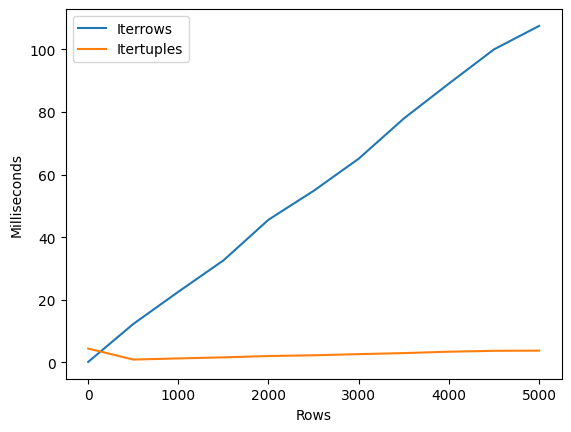

In [41]:
#Q30
master_rowtuple_dict = {}
rows_1_list = []
rows_times_list = []
tuples_times_list = []

for number in range(1, 5500, 500):
    df = rand_df(number)
    rows_1_list.append(number)
    
    start_time_0 = time.time()
    for row in df.iterrows():
        pass
    end_time_0 = time.time()
    final_time_0 = (end_time_0 - start_time_0)*1000
    rows_times_list.append(final_time_0)
    
    master_rowtuple_dict["Iterrows"] = rows_times_list
    
    start_time_1 = time.time()
    for row in df.itertuples():
        pass
    end_time_1 = time.time()
    final_time_1 = (end_time_1 - start_time_1)*1000
    tuples_times_list.append(final_time_1)
    
    master_rowtuple_dict["Rows"] = rows_1_list
    master_rowtuple_dict["Itertuples"] = tuples_times_list
    
rowtuple_df = pd.DataFrame(master_rowtuple_dict).set_index(["Rows"])
rowtuple_df.plot.line(ylabel = "Milliseconds")
None

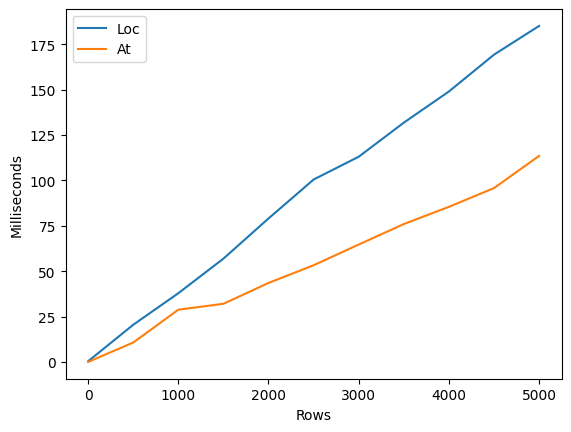

In [42]:
#Q31
master_locat_dict = {}
rows_2_list = []
loc_times_list = []
at_times_list = []

for number in range(1, 5500, 500):
    df = rand_df(number)
    rows_2_list.append(number)
    
    start_time_2 = time.time()
    loc_total = 0
    for idx in df.index:
        for col in df.columns:
            loc_total += df.loc[idx, col]
        end_time_2 = time.time()
    final_time_2 = (end_time_2 - start_time_2)*1000
    loc_times_list.append(final_time_2)
    
    master_locat_dict["Loc"] = loc_times_list
    
    start_time_3 = time.time()
    at_total = 0
    for idx in df.index:
        for col in df.columns:
            at_total += df.at[idx, col]
        end_time_3 = time.time()
    final_time_3 = (end_time_3 - start_time_3)*1000
    at_times_list.append(final_time_3)
    
    master_locat_dict["Rows"] = rows_2_list
    master_locat_dict["At"] = at_times_list
    
locat_df = pd.DataFrame(master_locat_dict).set_index(["Rows"])
locat_df.plot.line(ylabel = "Milliseconds")
None

In [43]:
def laugh(x):
    return "ha" * x

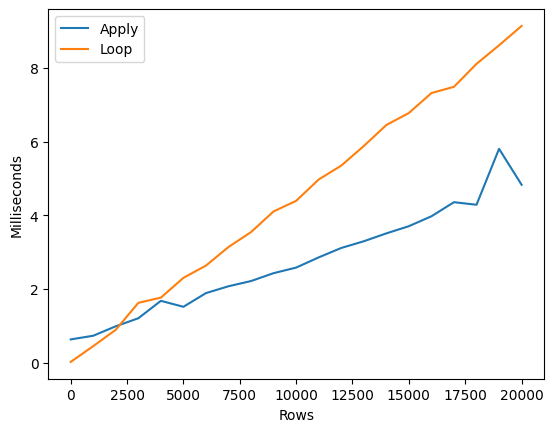

In [44]:
#Q32
master_loopapply_dict = {}
rows_3_list = []
loop_list = []
apply_method_list = []

for number in range(1, 21000, 1000):
    df = rand_df(number)
    rows_3_list.append(number)
    
    start_time_4 = time.time()
    result = df["A"].apply(laugh).tolist()
    end_time_4 = time.time()
    final_time_4 = (end_time_4 - start_time_4)*1000
    apply_method_list.append(final_time_4)
    
    master_loopapply_dict["Apply"] = apply_method_list
    
    start_time_5 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
        end_time_5 = time.time()
    final_time_5 = (end_time_5 - start_time_5)*1000
    loop_list.append(final_time_5)
    
    master_loopapply_dict["Rows"] = rows_3_list
    master_loopapply_dict["Loop"] = loop_list
    
loopapply_df = pd.DataFrame(master_loopapply_dict).set_index(["Rows"])
loopapply_df.plot.line(ylabel = "Milliseconds")
None